# Toxic Comment Classification Challenge

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge



Lectura de train y test

In [1]:
import pandas as pd
import io
import requests
import numpy as np

# url datos en repositorio del proyecto
url_train = "https://github.com/czammar/MA_finalproject/blob/master/data/train.csv?raw=true"
url_test = "https://raw.githubusercontent.com/czammar/MA_finalproject/master/data/test.csv?raw=true"
url_test_labels = "https://github.com/czammar/MA_finalproject/blob/master/data/test_labels.csv?raw=true"

# Leemolos los datos de train, test y labels del test desde nuestro repositorio usando requesto con io
rtrain=requests.get(url_train).content
rtest=requests.get(url_test).content
rtest_labels=requests.get(url_test_labels).content

# Cargamos io hacia pandas
train = pd.read_csv(io.StringIO(rtrain.decode('utf-8')))
test = pd.read_csv(io.StringIO(rtest.decode('utf-8')))
test_labels = pd.read_csv(io.StringIO(rtest_labels.decode('utf-8')))

In [2]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


## Limpieza de datos


In [3]:
# Natural language toolkit, nos ayudara con preprocessing de los datos
import re
import nltk
#nltk.download('stopwords')

# Carga un set de stopwords predefinidas
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [4]:
# Funcion para ayudarnos a sustituir abreviaciones
def decontracted(phrase):
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [5]:
# Set adicional de stopwords, removeremos palabras tanto de este set como del que
# viene definido en el nltk
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [6]:
# Función auxiliar para remover stopwords y otras normalizaciones de texto
def remove_stopwords(dataframe):
  SYNS = []
  for sentance in dataframe:
    sentance = re.sub('\\n', ' ', sentance)
    sentance = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'', sentance)
    sentance = re.sub("\[\[User.*",'',sentance)
    sentance = re.sub("(http://.*?\s)|(http://.*)",'',sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in STOPWORDS)
    SYNS.append(sentance.strip())
  return SYNS

In [7]:
# Remueve stopwords
synops_train = remove_stopwords(train['comment_text'])

In [8]:
#Los primeros 5 comentarios quedan como sigue
synops_train[:5]

['Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since I am retired now',
 'D aww He matches this background colour I am seemingly stuck with Thanks talk January UTC',
 'Hey man I am really not trying to edit war It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info',
 'More I can not make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know 

In [11]:
train['clean_text'] = synops_train

In [12]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I am really not trying to edit war It ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can not make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember wh...
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,Congratulations from me as well use the tools ...
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,Your vandalism to the Matt Shirvington article...
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,Sorry if the word nonsense was offensive to yo...
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,alignment on this subject and which are contra...


## Sets

In [9]:
drop_col = ['id', 'is_clean']  # columns not neccessary - can be dropped
text_col = ['comment_text']  # text feature
label_col = [col for col in train.columns if col not in text_col + drop_col] 

In [10]:
#Dividir train en train y test  20% train y 80% test
import random
random.seed(10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['comment_text'], 
                                                  train[label_col], test_size=0.2, random_state=2019)

print('Data points in train data after splitting:', len(X_train))
print('Data points in valiadtion data:', len(X_test))

Data points in train data after splitting: 127656
Data points in valiadtion data: 31915


In [11]:
y_train[y_train['toxic']==1].count()

toxic            12171
severe_toxic     12171
obscene          12171
threat           12171
insult           12171
identity_hate    12171
dtype: int64

In [12]:
y_test[y_test['toxic']==1].count()

toxic            3123
severe_toxic     3123
obscene          3123
threat           3123
insult           3123
identity_hate    3123
dtype: int64

In [ ]:
#y_train.to_csv("train.csv")
#y_test.to_csv("test.csv")

**Conteos de comentarios**

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS

sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

In [14]:
x0=y_train.iloc[:,:6].sum()

In [15]:
import pandas as pd
xo = pd.DataFrame(list(x0.items()))
xo.columns = ["type", "comment"]
xo = xo.sort_values(['comment']).reset_index(drop=True)
#xo['%'] = xo.comment / xo.comment.sum()

In [16]:
xo

,type,comment
0,threat,384
1,identity_hate,1088
2,severe_toxic,1264
3,insult,6254
4,obscene,6696
5,toxic,12171


In [ ]:
#plot
#plt.figure(figsize=(16,8))
#ax= sns.barplot(xo.type, xo.comment, alpha=0.5, palette="rocket")

#plt.title("Cantidad de ocurrencias por tipo de comentario")
#plt.ylabel('# de ocurrencias', fontsize=20)
#plt.xlabel('Tipo de comentario ', fontsize=20)

#loop para agregar eqtiuetas
#rects = ax.patches
#labels = x0.values
#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height + 5,label,size=15, ha='center', va='bottom')

#plt.show()

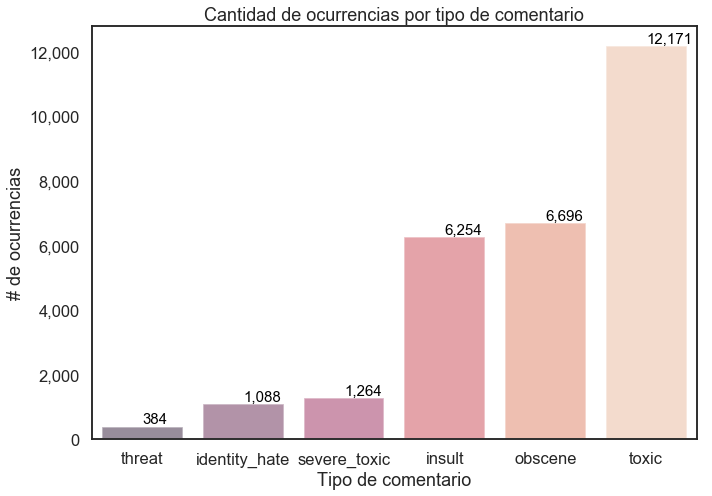

In [17]:
xo = xo.sort_values(['comment']).reset_index(drop=True)

plt.figure(figsize=(10,7))
# plot barh chart with index as x values
ax = sns.barplot(xo.type, xo.comment,alpha=0.5, palette="rocket")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Tipo de comentario", ylabel='# de ocurrencias')
plt.title("Cantidad de ocurrencias por tipo de comentario")
# add proper Dim values as x labels
ax.set_xticklabels(xo.type)
for item in ax.get_xticklabels(): item.set_rotation(0)
for i, v in enumerate(xo["comment"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', va ='bottom',size=15)
plt.tight_layout()
plt.show()

In [20]:
rowsums=y_train.iloc[:,:6].sum(axis=1)
y_train['clean']=(rowsums==0)
#x=y_train.iloc[:,:6].sum()

In [24]:
total_clean=y_train.loc[y_train['clean'] == True].count()
#total_clean

In [35]:
#Yalidt
prueba=y_train[:30]
prueba

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
15176,0,0,0,0,0,0,True
64290,0,0,0,0,0,0,True
64709,0,0,0,0,0,0,True
87891,0,0,0,0,0,0,True
98308,0,0,0,0,0,0,True
13529,0,0,0,0,0,0,True
41231,0,0,0,0,0,0,True
149156,0,0,0,0,0,0,True
71874,0,0,0,0,0,0,True
38640,0,0,0,0,0,0,True


Ahora añadimos los que no pertenecen a esas categorias:



In [48]:
rowsums=prueba.iloc[:,0:].sum(axis=0)
rowsums

toxic             3.0
severe_toxic      0.0
obscene           1.0
threat            0.0
insult            1.0
identity_hate     0.0
clean            27.0
dtype: float64

In [106]:
#prueba.iloc[:,0:-1]

In [57]:
#Dataframe que incluye los clean
rowsums=y_train.iloc[:,0:].sum(axis=0)
rowsums = pd.DataFrame(list(rowsums.items()))
rowsums.columns = ["type", "comment"]
rowsums = rowsums.sort_values(['comment']).reset_index(drop=True)
rowsums['%'] = rowsums.comment /rowsums['comment'].sum()
rowsums

,type,comment,%
0,threat,384.0,0.002693
1,identity_hate,1088.0,0.007630
2,severe_toxic,1264.0,0.008864
3,insult,6254.0,0.043858
4,obscene,6696.0,0.046958
5,toxic,12171.0,0.085352
6,clean,114740.0,0.804645


In [59]:
#rowsums=y_train.iloc[:,0:].sum(axis=1)
#train['clean']=(rowsums==0)
#x=train.iloc[:,2:].sum() 

#plot
#plt.figure(figsize=(16,8))
#ax= sns.barplot(rowsums.index, rowsums.values, alpha=0.5, palette="rocket")

#plt.title("Cantidad de ocurrencias por tipo")
#plt.ylabel('# de ocurrencias', fontsize=20)
#plt.xlabel('Tipo de comentario ', fontsize=20)

#loop para agregar eqtiuetas
#rects = ax.patches
#labels = x.values
#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
#ax.invert_xaxis

#plt.show()

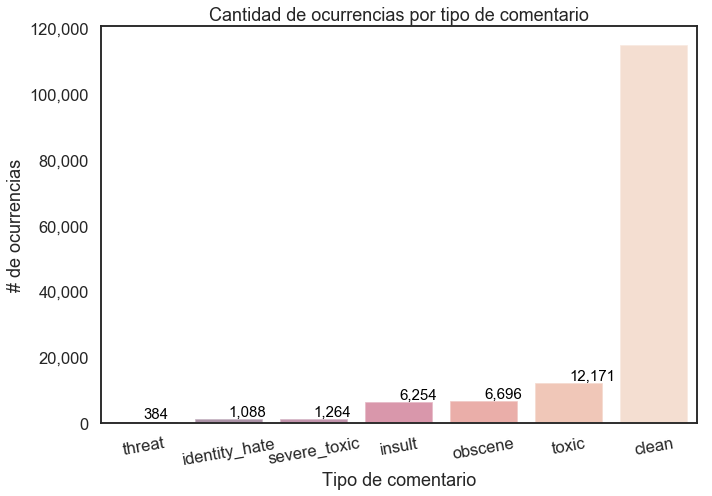

In [61]:
rowsums = rowsums.sort_values(['comment']).reset_index(drop=True)

plt.figure(figsize=(10,7))
# plot barh chart with index as x values
ax = sns.barplot(rowsums.type, rowsums.comment,alpha=0.5, palette="rocket")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Tipo de comentario", ylabel='# de ocurrencias')
plt.title("Cantidad de ocurrencias por tipo de comentario")
# add proper Dim values as x labels
ax.set_xticklabels(rowsums.type)
for item in ax.get_xticklabels(): item.set_rotation(10)
for i, v in enumerate(xo["comment"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', va ='bottom',size=15)
plt.tight_layout()
plt.show()

In [82]:
rowsums=y_train.iloc[:,:6].sum(axis=1)
y_train['clean']=(rowsums==0)
x=y_train.iloc[:,:6].sum()   #Suma las etiquetas de todas las clases incluyendo los clean

x1 = pd.DataFrame(list(x.items()))
x1.columns = ["type", "comment"]
x1 = x1.sort_values(['comment']).reset_index(drop=True)

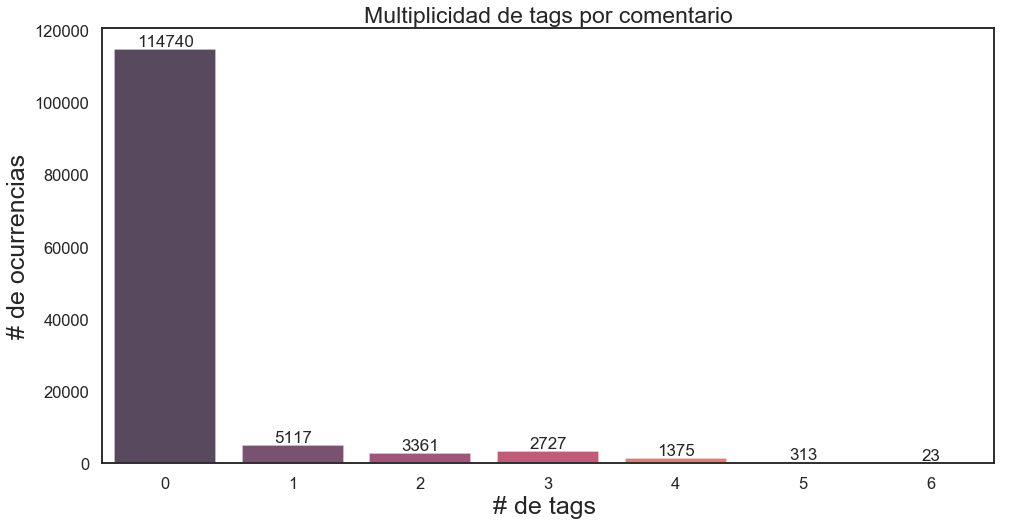

In [102]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8,palette="rocket")
plt.title("Multiplicidad de tags por comentario",fontsize=23)
plt.ylabel('# de ocurrencias', fontsize=25)
plt.xlabel('# de tags ', fontsize=25)

#loop para agregar labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,
            size=17, ha='center', va='bottom')

plt.show()

**Tablas de contingencia**

In [108]:
temp_df=y_train.iloc[:,0:-1]
#temp_df

In [110]:
#del temp_df["clean_text"]
#del temp_df["clean"]

In [109]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)  127656  127656  127656
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  115485     0  115070   415  115461   24  115056   429   
1                   10907  1264    5890  6281   11811  360    6346  5825   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   115408    77  
1                    11160  1011

In [111]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  115485     0  115070   415  115461   24  115056   429   
1                   10907  1264    5890  6281   11811  360    6346  5825   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   115408    77  
1                    11160  1011

In [131]:
main_col="toxic"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['severe_toxic', 'obscene', 'threat', 'insult','identity_hate']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

severe_toxic             obscene              threat            \
severe_toxic            0         1         0         1         0         1   
toxic                                                                         
0                0.904658  0.000000  0.901407  0.003251  0.904470  0.000188   
1                0.085441  0.009902  0.046140  0.049203  0.092522  0.002820   

                insult           identity_hate            
severe_toxic         0         1             0         1  
toxic                                                     
0             0.901297  0.003361      0.904055  0.000603  
1             0.049712  0.045630      0.087422  0.007920

In [119]:
temp_df.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [126]:
main_col="severe_toxic"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'obscene', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic             obscene              threat            \
toxic                0         1         0         1         0         1   
severe_toxic                                                               
0             0.904658  0.085441  0.947100  0.042998  0.987819  0.002280   
1             0.000000  0.009902  0.000447  0.009455  0.009173  0.000729   

                insult            
toxic                0         1  
severe_toxic                      
0             0.949568  0.040531  
1             0.001441  0.008460

In [127]:
main_col="obscene"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic           severe_toxic              threat            \
toxic           0         1            0         1         0         1   
obscene                                                                  
0        0.901407  0.046140     0.947100  0.000447  0.946434  0.001112   
1        0.003251  0.049203     0.042998  0.009455  0.050558  0.001896   

           insult            
toxic           0         1  
obscene                      
0        0.936838  0.010708  
1        0.014171  0.038283

In [128]:
main_col="threat"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'obscene','insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic           severe_toxic             obscene            \
toxic          0         1            0         1         0         1   
threat                                                                  
0       0.904470  0.092522     0.987819  0.009173  0.946434  0.050558   
1       0.000188  0.002820     0.002280  0.000729  0.001112  0.001896   

          insult            
toxic          0         1  
threat                      
0       0.949944  0.047048  
1       0.001065  0.001943

In [129]:
main_col="insult"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'obscene', 'threat']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic           severe_toxic             obscene            \
toxic          0         1            0         1         0         1   
insult                                                                  
0       0.901297  0.049712     0.949568  0.001441  0.936838  0.014171   
1       0.003361  0.045630     0.040531  0.008460  0.010708  0.038283   

          threat            
toxic          0         1  
insult                      
0       0.949944  0.001065  
1       0.047048  0.001943

In [132]:
y_train = pd.read_csv("train.csv")

In [133]:
y_train

,Unnamed: 0,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,15176,0,0,0,0,0,0,Baker removed the picture primarily as an atta...
1,64290,0,0,0,0,0,0,Image Peter macnicol jpg Thanks for uploading ...
2,64709,0,0,0,0,0,0,Is the UK multinational An editor had added th...
3,87891,0,0,0,0,0,0,Please do not remove messages from your talk p...
4,98308,0,0,0,0,0,0,Images Wikipedia Picture tutorial
5,13529,0,0,0,0,0,0,Request for change in lead I tried to personal...
6,41231,0,0,0,0,0,0,Think of it as prophylaxis
7,149156,0,0,0,0,0,0,I believe it is rolling out slowly I had an op...
8,71874,0,0,0,0,0,0,I forgot to thank Zenanarh and DIREKTOR withou...
9,38640,0,0,0,0,0,0,Geoff Boycott describes the organisation of th...


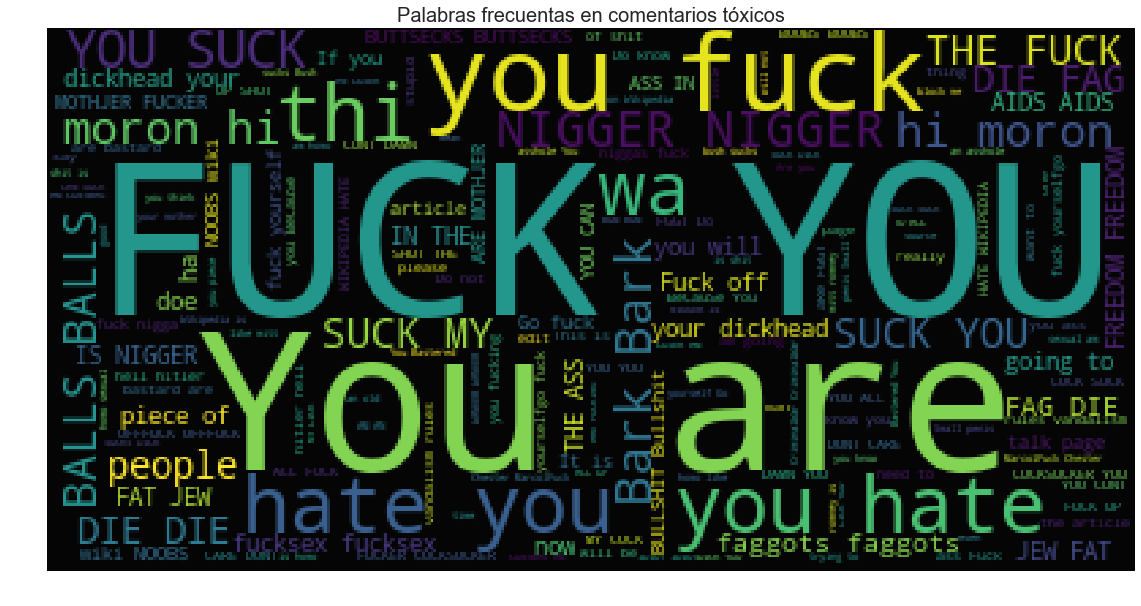

In [138]:
rnd_comments = y_train[y_train['toxic'] == 1].sample(n=10000)['clean_text'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update())
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Palabras frecuentas en comentarios tóxicos", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

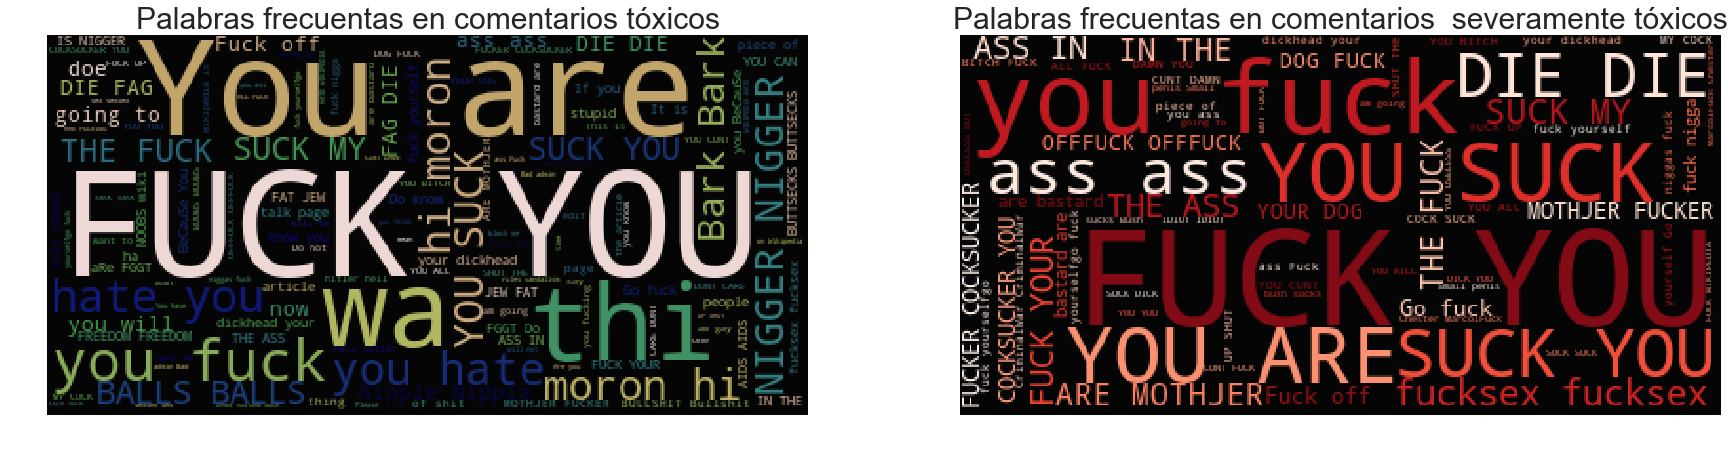

In [176]:
#wordcloud for clean comments
#Toxic comments
subset=y_train[y_train.toxic==1] #subsetting only those records which are classified as toxic
text=subset.clean_text.values #getting the words
wc= WordCloud(background_color="black",max_words=3000,stopwords=STOPWORDS.update()) #creating a word cloud 
wc.generate(" ".join(text)) #generating text 
plt.figure(figsize=(30,30)) #figure dimensions
plt.subplot(221) #as we are plotting multiple plots writing it as subset 
plt.axis("off")
plt.title("Palabras frecuentas en comentarios tóxicos", fontsize=30)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
#severe_toxic_mask=np.array(Image.open("bomb.jpg"))
#severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=y_train[y_train.severe_toxic==1]
text=subset.clean_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS.update())
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Palabras frecuentas en comentarios  severamente tóxicos", fontsize=30)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)


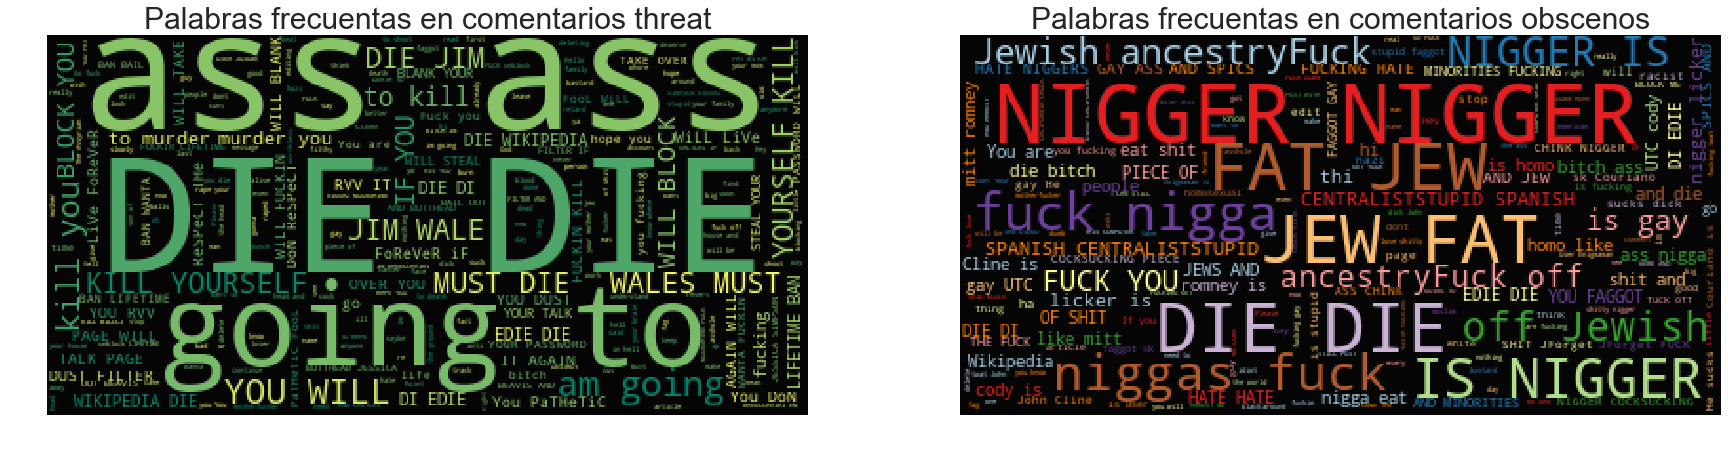

In [177]:
#Threat comments
subset=y_train[y_train.threat==1]
text=subset.clean_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS.update())
wc.generate(" ".join(text))
plt.figure(figsize=(30,30)) #figure dimensions
plt.subplot(223) #as we are plotting multiple plots writing it as subset
plt.axis("off")
plt.title("Palabras frecuentas en comentarios threat", fontsize=30)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#Obscene comments
plt.subplot(224)
subset=y_train[y_train.identity_hate==1]
text=subset.clean_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS.update())
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Palabras frecuentas en comentarios obscenos", fontsize=30)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=2534), alpha=0.98)

(6.5, -0.5)

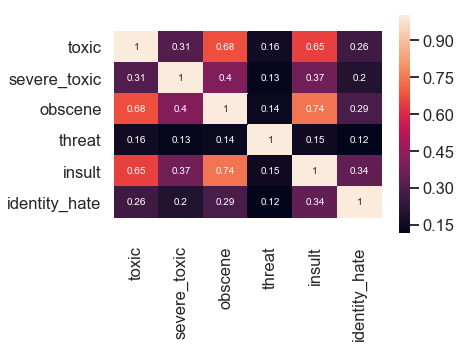

In [135]:
corr=temp_df.corr()
ax = sns.heatmap(corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize # Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer

def get_topn_tfidf_feat_byClass(X_tfidf, t, feature_names, labels, topn):
    
    feat_imp_dfs = {}
    
    for label in labels:
        # get indices of rows where label is true
        label_ids = y_train.index[y_train[label] == 1]
        # get subset of rows
        label_rows = X_tfidf[label_ids].toarray()
        # calc mean feature importance
        feat_imp = label_rows.mean(axis = 0)
        # sort by column dimension and get topn feature indices
        topn_ids = np.argsort(feat_imp)[::-1][:topn]
        # combine tfidf value with feature name
        topn_features = [(feature_names[i], feat_imp[i]) for i in topn_ids]
        # df
        topn_df = pd.DataFrame(topn_features, columns = ['word_feature', 'tfidf_value'])
        # save 
        feat_imp_dfs[label] = topn_df
    return feat_imp_dfs

tfidf = TfidfVectorizer(ngram_range = (1,1), min_df = 100, 
                        strip_accents='unicode', analyzer='word',
                        use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english')
X_unigrams = tfidf.fit_transform(train['clean_text'])
X_unigrams.shape, len(tfidf.get_feature_names())


feature_names = np.array(tfidf.get_feature_names())
imp_dfs = get_topn_tfidf_feat_byClass(X_unigrams, train, feature_names, label_col, topn = 10)

plt.figure(figsize=(15,10))

for i, label in enumerate(label_col):
    plt.subplot(3, 2, i+1 )
    sns.barplot(imp_dfs[label].word_feature[:10], imp_dfs[label].tfidf_value[:10], alpha = 0.8)
    plt.title("Important UniGrams for the class:{}".format(label))
    plt.tight_layout()

KeyError: 'clean_text'

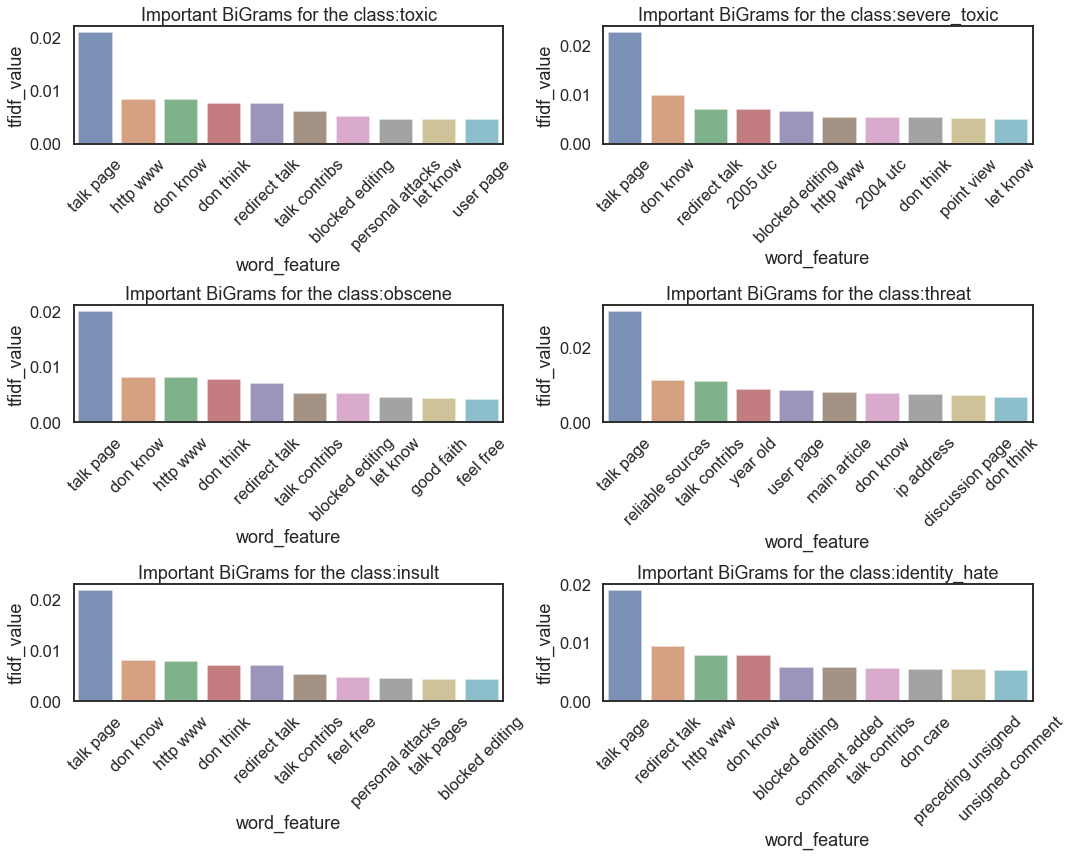

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (2,2), min_df = 100, 
                        strip_accents='unicode', analyzer='word',
                        use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english')
X_bigrams = tfidf.fit_transform(train['comment_text'])
X_bigrams.shape, len(tfidf.get_feature_names())

feature_names = np.array(tfidf.get_feature_names())
imp_dfs = get_topn_tfidf_feat_byClass(X_bigrams, train, feature_names, label_col, topn = 10)

plt.figure(figsize=(15,12))

for i, label in enumerate(label_col):
    plt.subplot(3, 2, i + 1)
    by_class = sns.barplot(imp_dfs[label].word_feature[:10], imp_dfs[label].tfidf_value[:10], alpha = 0.8)
    plt.title("Important BiGrams for the class:{}".format(label))
    for item in by_class.get_xticklabels():
        item.set_rotation(45)
    plt.tight_layout()